# Nama = `Ahmad Hamdani`
# Nim = `233307092`
# Kelas = `4D`

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd

Kode tersebut digunakan untuk mengimpor pustaka-pustaka yang diperlukan, yaitu `pandas` dan `numpy` untuk mengolah data, `matplotlib.pyplot` dan `seaborn` untuk visualisasi, serta modul dari `sklearn` seperti `train_test_split` untuk membagi data, `LinearRegression` untuk membuat model regresi linear, dan `mean_squared_error` serta `r2_score` untuk mengevaluasi kinerja model.

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/regresi_1_insurance.csv')  # Pastikan file tersedia di direktori kerja
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Kode tersebut digunakan untuk membaca file `insurance.csv` ke dalam sebuah DataFrame bernama `df` menggunakan `pandas`, lalu menampilkan 5 baris pertama dari data tersebut dengan `df.head()` untuk melihat struktur awal data.

Data menunjukkan informasi asuransi lima orang, termasuk usia, jenis kelamin, BMI, jumlah anak, status perokok, wilayah tempat tinggal, dan biaya asuransi yang harus dibayar (`charges`).

Text(0.5, 1.0, 'Missing value in the dataset')

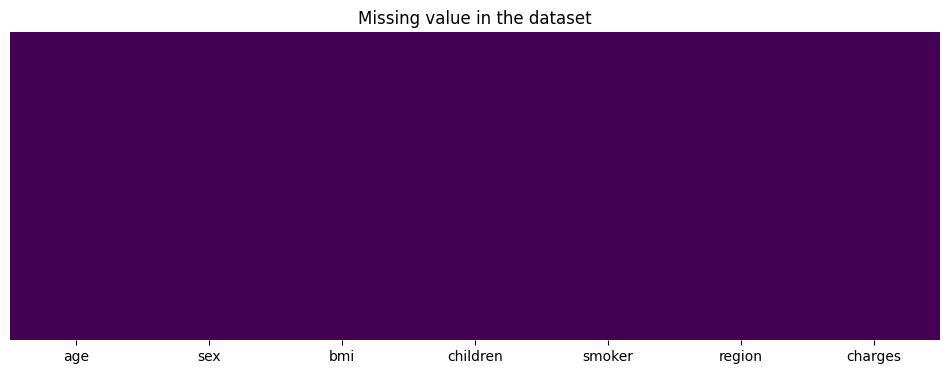

In [3]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

Kode tersebut membuat visualisasi heatmap untuk menampilkan nilai yang hilang (missing value) pada dataset `df`, dengan ukuran gambar 12x4 dan warna 'viridis', tanpa bilah warna (cbar) dan label baris (yticklabels).

Hasilnya menunjukkan bahwa tidak ada data yang hilang dalam dataset, semua nilai terisi lengkap.

# 3. Exploratory Data Analysis (EDA)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


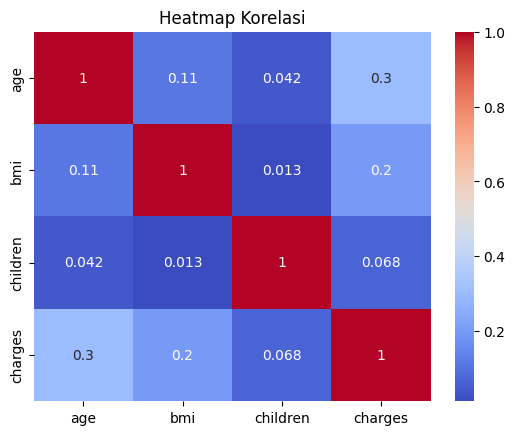

In [4]:
print(df.describe())
print(df.isnull().sum())
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()



Kode ini menampilkan ringkasan statistik data, menghitung jumlah nilai yang hilang per kolom, dan membuat heatmap yang menunjukkan korelasi antar kolom numerik dengan nilai korelasi yang ditampilkan di dalam sel.

Hasil `df.describe()` menunjukkan statistik deskriptif untuk setiap kolom, seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan maksimum. Sementara itu, hasil `df.isnull().sum()` menunjukkan bahwa tidak ada nilai yang hilang (missing values) di semua kolom.

Hasilnya menunjukkan bahwa semakin tua dan semakin tinggi BMI seseorang, biaya cenderung sedikit meningkat, tapi pengaruhnya lemah. Jumlah anak tidak berpengaruh terhadap biaya.

# 4. Fitur dan Target

In [5]:
X = df.drop("charges", axis=1)
y = df["charges"]

Kode ini memisahkan data dalam dataframe `df` menjadi dua bagian: variabel independen `X`, yang berisi semua kolom kecuali kolom "charges", dan variabel dependen `y`, yang berisi hanya kolom "charges" sebagai target yang ingin diprediksi.

# 5. Kolom Numarik dan Kategori

In [6]:
num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

Kode ini mendefinisikan dua list: `num_cols`, yang berisi nama-nama kolom fitur numerik yaitu "age", "bmi", dan "children", serta `cat_cols`, yang berisi nama-nama kolom fitur kategorikal yaitu "sex", "smoker", dan "region".

# 6. Preprocessing Data

In [7]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first'), cat_cols)
])


Kode ini membuat objek `preprocessor` menggunakan `ColumnTransformer` untuk melakukan preprocessing pada fitur numerik dan kategorikal. Fitur numerik, yang ada di dalam list `num_cols`, akan diproses dengan `StandardScaler` untuk menstandarkan data, sementara fitur kategorikal, yang ada di dalam list `cat_cols`, akan diproses dengan `OneHotEncoder`, dengan opsi `drop='first'` untuk menghindari kolinearitas dengan menghapus kategori pertama dari setiap fitur kategorikal.

# 7. Pipeline Model

In [8]:
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])


Kode ini membuat objek `pipeline` yang berisi dua langkah: pertama, melakukan preprocessing data menggunakan objek `preprocessor` yang sudah didefinisikan sebelumnya (untuk menstandarkan fitur numerik dan melakukan one-hot encoding pada fitur kategorikal), dan kedua, menerapkan model **Linear Regression** (`regressor`) untuk melakukan pelatihan pada data yang sudah diproses. Dengan menggunakan pipeline, kedua langkah ini dilakukan secara berurutan dalam satu objek yang mudah dikelola.

# 8. Training

In [9]:
pipeline.fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

Kode ini melatih model yang ada di dalam `pipeline` menggunakan data fitur `X` dan target `y`. Langkah pertama dalam pipeline, yaitu preprocessing, akan diterapkan pada data `X`, lalu data yang sudah diproses akan digunakan untuk melatih model **Linear Regression** yang ada pada langkah kedua.

# 9. Simpan Pipeline

In [10]:
with open("model_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

Kode ini menyimpan objek `pipeline` yang sudah dilatih ke dalam file bernama `model_pipeline.pkl` menggunakan modul `pickle`. File ini akan disimpan dalam format biner (`"wb"`) sehingga Anda dapat memuatnya kembali di masa depan tanpa perlu melatih model dari awal.

# 10. Evaluasi Model

In [11]:
# Memisahkan data menjadi data pelatihan dan pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode ini membagi data menjadi dua bagian: **data pelatihan** (`X_train`, `y_train`) dan **data pengujian** (`X_test`, `y_test`). Sebanyak 80% data akan digunakan untuk pelatihan dan 20% sisanya untuk pengujian. Proses pemisahan ini dilakukan secara acak, namun dengan menggunakan `random_state=42` untuk memastikan hasil yang konsisten setiap kali kode dijalankan.

In [12]:
# Memuat pipeline yang sudah disimpan
with open("model_pipeline.pkl", "rb") as f:
    pipeline = pickle.load(f)

# Melakukan prediksi dengan model pipeline pada data uji
y_pred = pipeline.predict(X_test)

# Menghitung MSE dan R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 33251356.03157253
R2 Score: 0.7858188230456846


Kode ini memuat pipeline yang telah disimpan sebelumnya menggunakan `pickle`, lalu melakukan prediksi pada data uji (`X_test`) dengan model yang ada di dalam pipeline. Setelah itu, dihitung nilai **Mean Squared Error (MSE)** dan **R² Score** untuk mengevaluasi seberapa baik model memprediksi data uji, dan hasilnya dicetak di layar.

Hasil MSE sebesar 33,251,356.03 menunjukkan bahwa model memiliki kesalahan yang cukup besar dalam prediksi. Sementara itu, R² Score sebesar 0.7858 menunjukkan bahwa model dapat menjelaskan sekitar 78.58% variansi dalam data, yang berarti model cukup baik dalam memprediksi target.

# 10. Validasi Model

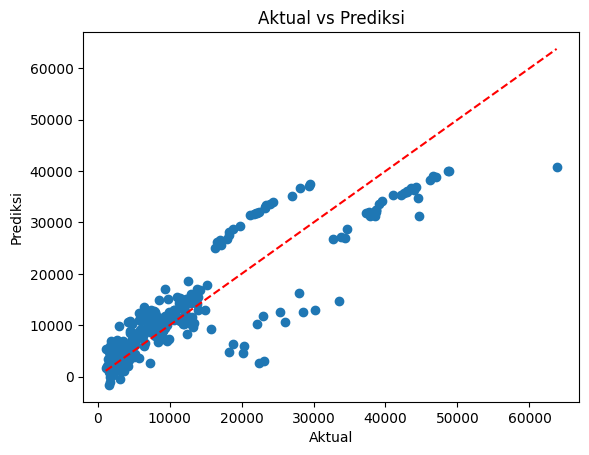

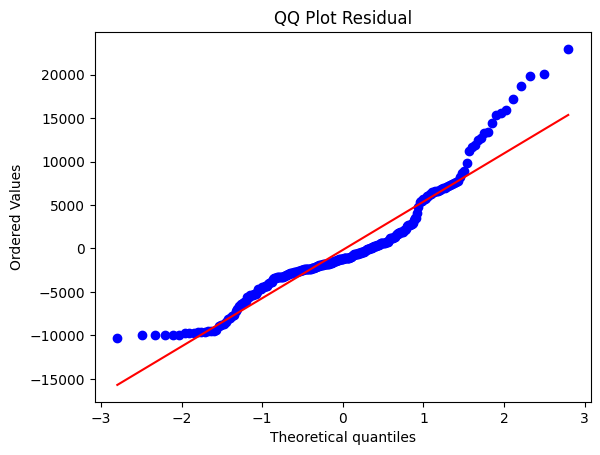

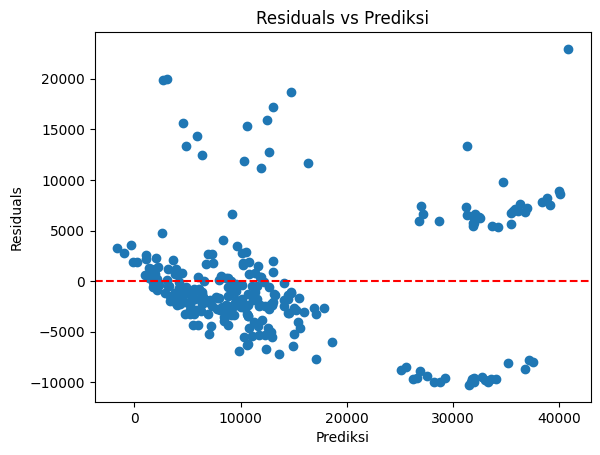

In [13]:
# a. Cek linearitas (Aktual vs Prediksi)
plt.scatter(y_test, y_pred)
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Aktual vs Prediksi')

# Menambahkan garis identitas y=x untuk referensi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# b. Cek normalitas residual (QQ Plot)
residuals = y_test - y_pred

# Plot QQ-plot untuk residual
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot Residual')
plt.show()

# c. Cek Homoskedastisitas (Plot Residual vs Prediksi)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residuals')
plt.title('Residuals vs Prediksi')
plt.show()


Kode ini melakukan tiga pemeriksaan diagnostik untuk mengevaluasi model regresi:

1. **Cek Linearitas (Aktual vs Prediksi)**: 
   - Plot ini membandingkan nilai aktual (`y_test`) dengan nilai prediksi (`y_pred`). Garis merah putus-putus (`y=x`) ditambahkan untuk memeriksa apakah prediksi model mendekati nilai aktual. Titik-titik yang tersebar di sekitar garis ini menunjukkan model bekerja dengan baik.

2. **Cek Normalitas Residual (QQ Plot)**:
   - **Residuals** dihitung sebagai selisih antara nilai aktual dan prediksi (`y_test - y_pred`). QQ plot ini digunakan untuk memeriksa apakah residual mengikuti distribusi normal. Jika titik-titik pada plot mengikuti garis lurus, ini menandakan bahwa residual mendekati distribusi normal.

3. **Cek Homoskedastisitas (Plot Residual vs Prediksi)**:
   - Plot ini digunakan untuk memeriksa apakah residual tersebar secara acak tanpa pola tertentu. Garis horizontal merah putus-putus di y=0 menunjukkan apakah residual memiliki varians yang konsisten di seluruh rentang prediksi. Jika titik-titik tersebar secara acak, ini menunjukkan homoskedastisitas yang baik.

Setelah ketiga plot ini ditampilkan, Anda bisa mengevaluasi apakah model linier memenuhi asumsi dasar regresi linier seperti linearitas, normalitas residual, dan homoskedastisitas.

Berdasarkan hasil plot:

Aktual vs Prediksi: Model cenderung salah memprediksi nilai rendah (terlalu tinggi) dan nilai tinggi (terlalu rendah). Beberapa kelompok data mengindikasikan faktor lain yang belum ditangkap.

QQ Plot Residual: Residual tidak normal, terlihat pola S-shaped dan ekor berat, yang menunjukkan distribusi residual yang tidak biasa.

Residual vs Prediksi: Varians residual tidak konstan, dengan pola yang menunjukkan model kurang akurat pada nilai prediksi tinggi.